In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def generating_function(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a4*np.array(x)) + a3*np.cos(a4*np.array(x))


def fit_function1(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a4*np.array(x)) + a3*np.cos(a4*np.array(x))

def fit_function2(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a3*np.array(x) + a4)    

In [14]:
def generate_data(n, a0, a1, a2, a3, a4, sigma,low,high):
    x = np.random.uniform(low, high, n)
    y = generating_function(x, a0, a1, a2, a3, a4) + np.random.normal(0, sigma, n)
    return x, y

In [15]:
a0 = 1
a1 = 1
a2 = 1
a3 = 1
a4 = 0

sigma = 0.5
low = 20   
high = 35
n = 100

In [16]:
x, y = generate_data(n, a0, a1, a2, a3, a4, sigma,low,high)

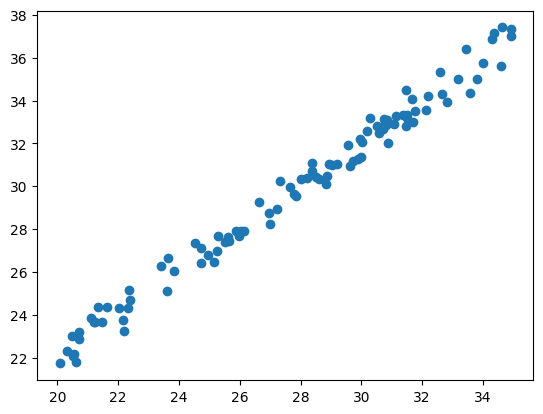

In [17]:
plt.plot(x, y, 'o')

In [18]:
from scipy.optimize import curve_fit    
popt1, pcov1 = curve_fit(fit_function1, x, y)
perr1 = np.sqrt(np.diag(pcov1))
popt2, pcov2 = curve_fit(fit_function2, x, y)
perr2 = np.sqrt(np.diag(pcov2))

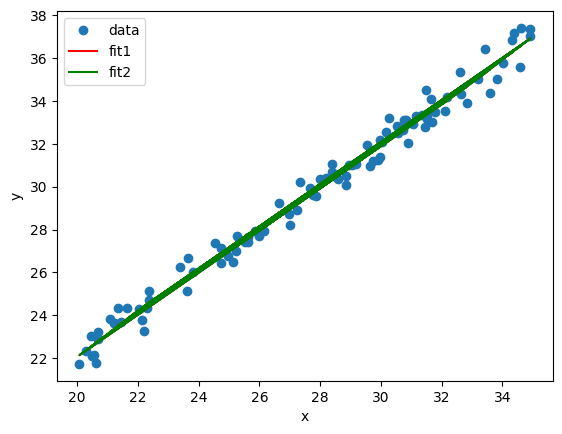

In [19]:
plt.plot(x, y, 'o')
plt.plot(x, fit_function1(x, *popt1), 'r-')
plt.plot(x, fit_function2(x, *popt2), 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'fit1', 'fit2'], loc='best')

In [20]:
print(popt1)
print(perr1)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fit_function1(x[i],*popt1))
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma*sigma)

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-5))

[ 2.50860258  0.982531   -0.03465237 -0.1041601   0.98175729]
[0.43486032 0.01521592 0.52929291 0.19777029 0.1782159 ]
Chi^2 / dof = 1.059E+02 / 95


In [21]:
print(popt2)
print(perr2)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fit_function2(x[i],*popt2))
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma*sigma)

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-5))

[ 2.50864744  0.98252948 -0.10977359  0.98177931  1.2488694 ]
[0.43485426 0.01521571 0.07971763 0.17821857 5.09591199]
Chi^2 / dof = 1.059E+02 / 95


In [22]:
print('Comparison:')
print('a0: ', a0, popt1[0], popt2[0])
print('a1: ', a1, popt1[1], popt2[1])
print('a2: ', a2, popt1[2], popt2[2]*np.cos(popt2[4]))
print('a3: ', a3, popt1[3], popt2[2]*np.sin(popt2[4]))
print('a4: ', a4, popt1[4], popt2[3])

print('Errors:')
print('a0: ', perr1[0], perr2[0])
print('a1: ', perr1[1], perr2[1])
print('a2: ', perr1[2], np.sqrt(np.abs(perr2[2]*np.cos(popt2[4]))**2 + np.abs(popt2[2]*np.sin(popt2[4])*perr2[4]))**2)
print('a3: ', perr1[3], np.sqrt(np.abs(perr2[2]*np.sin(popt2[4]))**2 + np.abs(popt2[2]*np.cos(popt2[4])*perr2[4]))**2)
print('a4: ', perr1[4], perr2[3])


Comparison:
a0:  1 2.5086025793127096 2.5086474397188154
a1:  1 0.9825310027797818 0.9825294847403848
a2:  1 -0.034652367678405495 -0.034731824108564964
a3:  1 -0.10416010408994639 -0.10413424607152884
a4:  0 0.9817572910563634 0.9817793125923954
Errors:
a0:  0.43486031967124433 0.43485426151050605
a1:  0.015215922281087714 0.015215714405423542
a2:  0.5292929080218919 0.5312951153913272
a3:  0.19777029481063432 0.1827090567223523
a4:  0.1782158968830234 0.17821856972401323
